# Import Libraries, Datas and Set up Display

In [70]:
import pandas as pd
pd.options.display.max_rows = 100
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
products = pd.read_csv('./DataFrames/Quality_Checked/qu_products.csv')
orderlines = pd.read_csv('./DataFrames/Quality_Checked/qu_orderlines.csv')
orders = pd.read_csv('./DataFrames/Quality_Checked/qu_orders.csv')
brands = pd.read_csv('./DataFrames/Quality_Checked/qu_brands.csv')

In [3]:
orderlines["Date"] = pd.to_datetime(orderlines["Date"])
orders['Date'] = pd.to_datetime(orders["Date"])

# Analysis

### Create all variables needed

In [418]:
#Average count of orders / month
count_orders = orders.resample('M', on='Date')['Order_ID'].count().reset_index()
avg_count_orders = count_orders.Order_ID.mean()
#Average Discount
avg_disc = orders.Difference.mean()
#Bestsellers
list_bestsellers = list(bestsellers.SKU)
Revenue_Bestsellers = Orderlines_Bestsellers.resample('M', on='Date')['Total_Price'].sum().reset_index()
Orderlines_Bestsellers = orderlines.loc[orderlines.SKU.isin(list_bestsellers)]
avg_price_orders_bestsellers= Revenue_Bestsellers.Total_Price.mean()
#Average Invoice
Revenue_Month = orders.resample('M',on='Date')['Total_Invoice'].sum().reset_index()
avg_Revenue_Month = Revenue_Month.Total_Invoice.mean()
Revenue_Day =  orders.resample('D',on='Date')['Total_Invoice'].sum().reset_index()
avg_Revenue_Day = Revenue_Day.Total_Invoice.mean()
#Average Quantity
Quantity_Month = orderlines.resample('M',on='Date').agg({'Quantity':'sum'}).reset_index()
avg_Quantity_Month = Quantity_Month.Quantity.mean()


## Bestsellers

In [45]:
#List of top 20 items :

bestsellers = (
    orderlines.groupby('SKU')['Quantity']
 .sum()
 .sort_values(ascending=False)
 .nlargest(20,)
 .reset_index()
)

In [6]:
f"The average price of the bestsellers is \
{products.loc[products.SKU.isin(bestsellers.SKU)]['Product_Price'].mean().round(2)}€"

'The average price of the bestsellers is 160.89€'

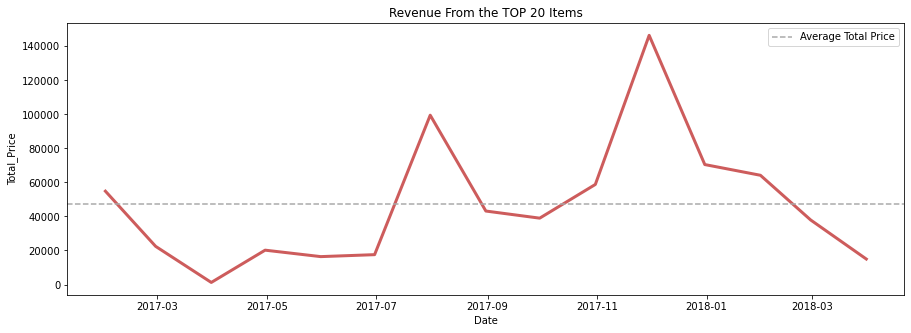

In [316]:
plt.subplots(figsize=(15, 5))

Plot_Bestsellers = sns.lineplot(
           data=Revenue_Bestsellers,
           x='Date',
           y='Total_Price',
    color='indianred',
    linewidth=3
    
    
)

Plot_Bestsellers.axhline(avg_price_orders_bestsellers, ls='--', c='darkgray',label='Average Total Price');
plt.title('Revenue From the TOP 20 Items')
plt.legend();

## Products 

In [281]:
##Most Expensives Items
Exp_Products = products[['SKU', 'Product_Name', 'Product_Price','Brand']].nlargest(100,'Product_Price').sort_values('Product_Price', ascending=False)


In [282]:
##Cheapest Items
Cheap_Products = products[['SKU', 'Product_Name', 'Product_Price','Brand']].nsmallest(100,'Product_Price').sort_values('Product_Price', ascending=False)


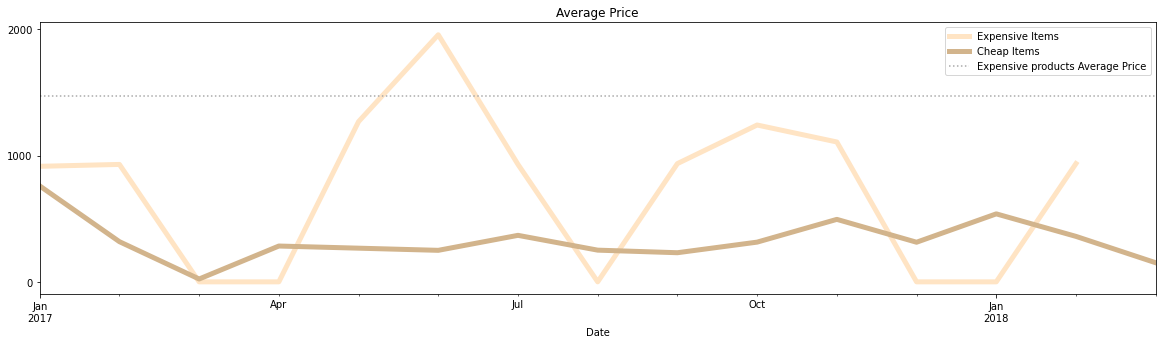

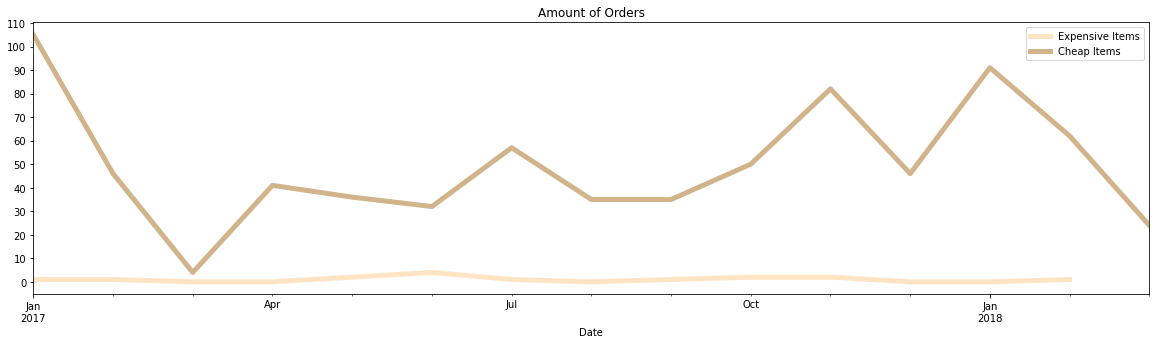

In [312]:
(
    orderlines[orderlines.SKU.isin(list(Exp_Products.SKU))]
    .resample('M', on='Date')['Total_Price']
    .sum()
    .plot.line(figsize=(20,5)
               ,linewidth=5, color='bisque',yticks=(0,1000,2000))
);
(
    orderlines[orderlines.SKU.isin(list(Cheap_Products.SKU))]
    .resample('M', on='Date')['Total_Price']
    .sum()
    .plot.line(figsize=(20,5)
               ,linewidth=5, color='tan',yticks=(0,1000,2000))
).axhline(Exp_Products.Product_Price.mean(), linestyle=':', color='darkgray',label='Expensive products Average Price')
;
L0=plt.legend()
L0.get_texts()[0].set_text('Expensive Items')
L0.get_texts()[1].set_text('Cheap Items')
plt.title('Average Price')

plt.subplots()
(
    orderlines[orderlines.SKU.isin(list(Exp_Products.SKU))]
    .resample('M', on='Date')['Order_ID']
    .count()
    .plot.line(figsize=(20,5)
               ,linewidth=5, color='bisque',yticks=(0,1000,2000))
);
(
    orderlines[orderlines.SKU.isin(list(Cheap_Products.SKU))]
    .resample('M', on='Date')['Order_ID']
    .count()
    .plot.line(figsize=(20,5)
               ,linewidth=5, color='tan', yticks=(0,10,20,30,40,50,60,70,80,90,100,110))
)
#.axhline(avg_count_orders, linestyle=':', color='black',label='Average Amount Orders');

;
L1=plt.legend()
L1.get_texts()[0].set_text('Expensive Items')
L1.get_texts()[1].set_text('Cheap Items')
plt.title('Amount of Orders');


In [328]:
avg_Revenue_Month

460631.27199999994

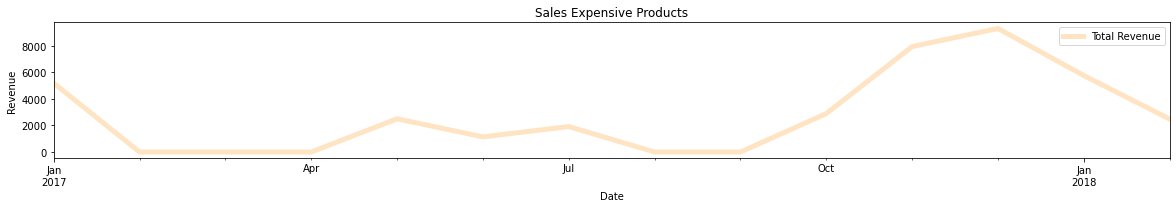

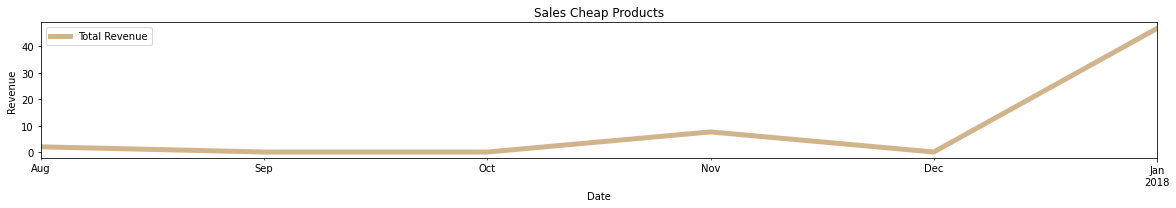

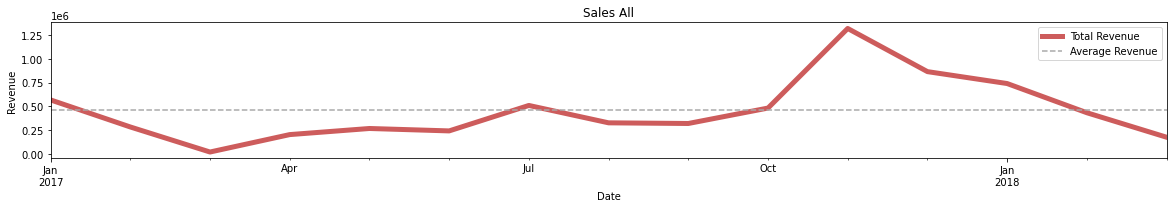

In [394]:
(
    orderlines[['Order_ID', 'Date', 'Unit_Price', 'SKU','Total_Price']]
    .nlargest(25,'Total_Price')
    .resample('M', on='Date')['Total_Price']
    .sum()
    .plot.line(figsize=(20,2.5), title='Sales Expensive Products'
               ,linewidth=5, color='bisque')
)
plt.ylabel('Revenue')
L=plt.legend()
L.get_texts()[0].set_text('Total Revenue')
plt.subplots()
(
    orderlines[['Order_ID', 'Date', 'Unit_Price', 'SKU','Total_Price']]
    .nsmallest(25,'Total_Price')
    .resample('M', on='Date')['Total_Price']
    .sum()
    .plot.line(figsize=(20,2.5), title='Sales Cheap Products'
               ,linewidth=5, color='tan')
)
plt.ylabel('Revenue')
L=plt.legend()
L.get_texts()[0].set_text('Total Revenue')
plt.subplots()
(
    orderlines[['Order_ID', 'Date', 'Unit_Price', 'SKU','Total_Price']]
    #.nlargest(25,'Total_Price')
    .resample('M', on='Date')['Total_Price']
    .sum()
    .plot.line(figsize=(20,2.5), title='Sales All'
               ,linewidth=5, color='indianred')
).axhline(avg_Revenue_Month, ls='--', c='darkgray',label='Average Revenue');
plt.ylabel('Revenue')
L=plt.legend()
L.get_texts()[0].set_text('Total Revenue');

## Orders

''

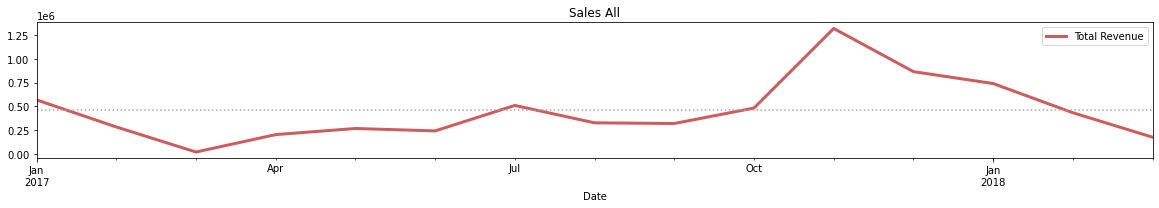

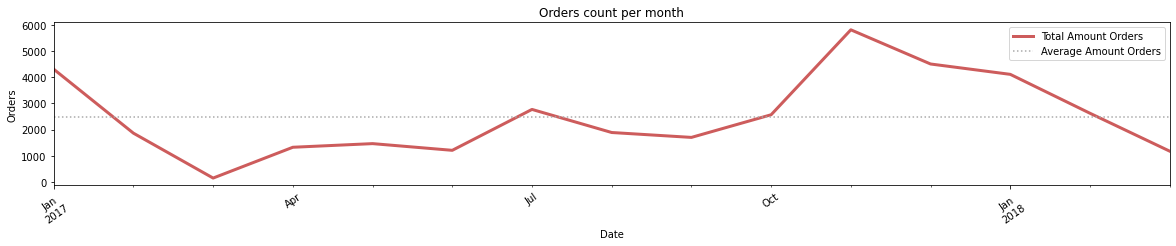

In [370]:
(
    orderlines[['Order_ID', 'Date', 'Unit_Price', 'SKU','Total_Price']]
    #.nlargest(25,'Total_Price')
    .resample('M', on='Date')['Total_Price']
    .sum()
    .plot.line(figsize=(20,2.5), title='Sales All'
               ,linewidth=3, color='indianred')
).axhline(avg_Revenue_Month, ls=':', c='darkgray');
L=plt.legend()
L.get_texts()[0].set_text('Total Revenue')


orders_Count = (
    orders.resample('M', on='Date').agg({'Order_ID':'count'}).plot.line(
        figsize=(20,3),
        title='Orders count per month', 
        xlabel='Date', 
        ylabel='Orders',
        linewidth=3,
        rot=35,
        color='indianred',
).axhline(avg_count_orders, linestyle=':', color='darkgray',label='Average Amount Orders'))
L=plt.legend()
L.get_texts()[0].set_text('Total Amount Orders')
;

/var/folders/kq/fhf47yp54w1byy_p5j5n4c340000gn/T/ipykernel_21861/2631879930.py:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  orders.groupby(['Week_Day'])


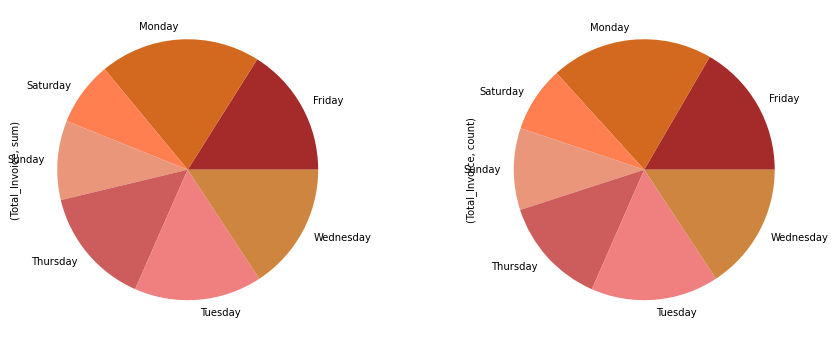

In [50]:
(
    orders.groupby(['Week_Day'])
    .agg({'Total_Invoice':['sum','count']})
    .plot.pie(figsize=(15,6),subplots=True,
              legend=False,
              colors=['brown','chocolate','coral', 'darksalmon','indianred','lightcoral','peru']
             )
);

## Price and Quantity


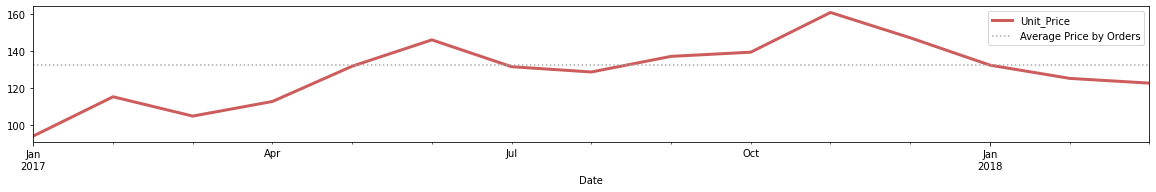

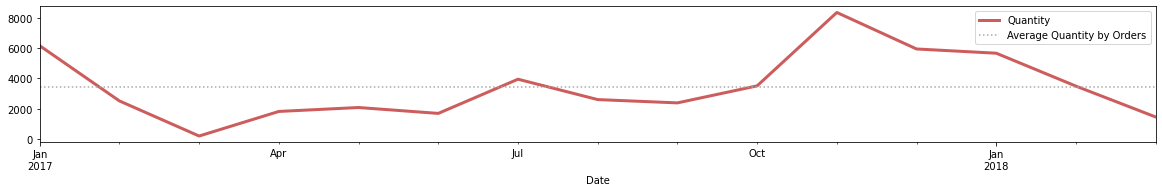

In [386]:
(
orderlines.resample('M',on='Date')['Unit_Price']
.mean()
 .plot.line(figsize=(20,2.5),linewidth=3, color='indianred')
).axhline(orderlines.Unit_Price.mean(),linestyle=':', color='darkgray',label='Average Price by Orders')

plt.legend();
plt.subplots()
(
orderlines.resample('M',on='Date')['Quantity']
.sum()
 .plot.line(
     figsize=(20,2.5),
     linewidth=3, 
     color='indianred',
 )
).axhline(avg_Quantity_Month,linestyle=':', color='darkgray',label='Average Quantity by Orders')
    

plt.legend();

''

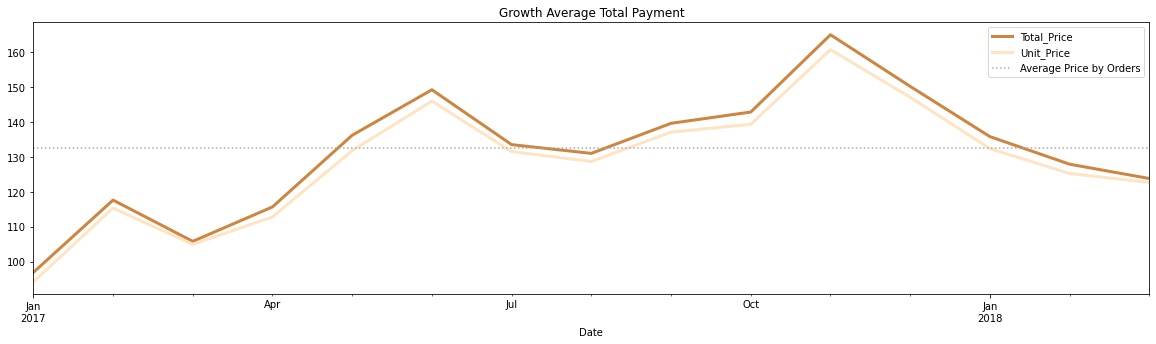

In [389]:
(
    orderlines.resample('M', on='Date')
    .agg({'Total_Price':'mean', 'Unit_Price':'mean'})
    .plot.line(figsize=(20,5),linewidth=3, color=['peru','bisque'],title='Growth Average Total Payment')            
).axhline(orderlines.Unit_Price.mean(),linestyle=':', color='darkgray',label='Average Price by Orders')
plt.legend()
;

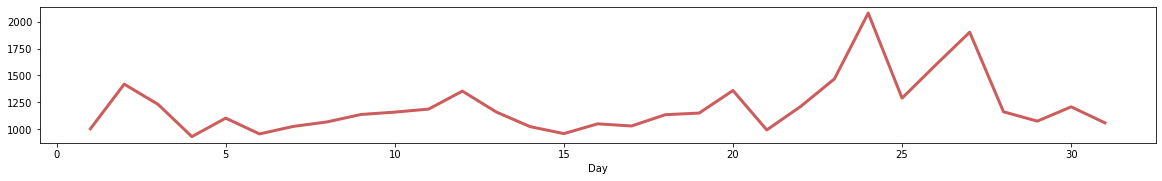

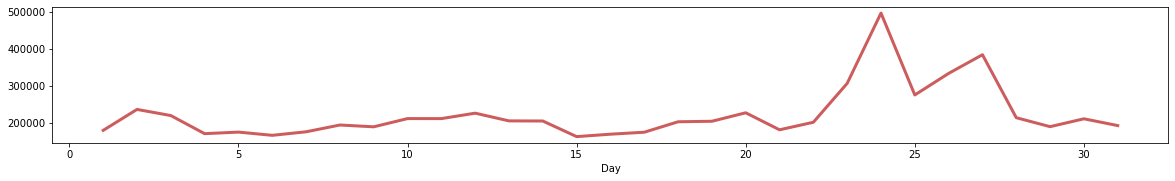

In [391]:
(
    orders.groupby('Day')['Order_ID']
    .count()
    .plot.line(figsize=(20,2.5),
              linewidth=3, color=['indianred','peru'])
              
)
plt.subplots()
(
    orders.groupby('Day')['Total_Invoice']
    .sum()
    .plot.line(figsize=(20,2.5),
              linewidth=3, color=['indianred','peru'])
              
);

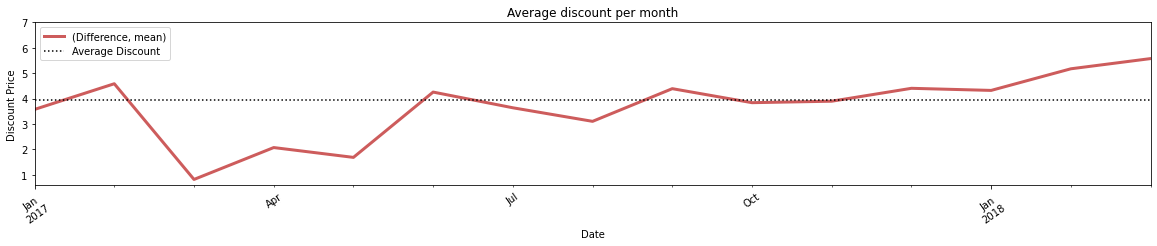

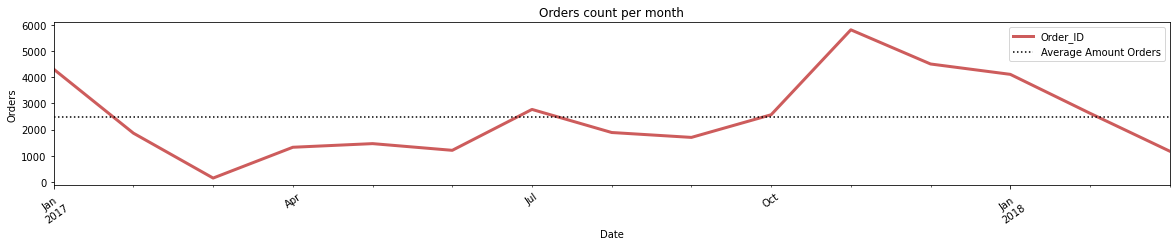

In [231]:
 orders_Disc = (
     orders.resample('M', on='Date').agg({'Difference':['mean']}).plot.line(
         figsize=(20,3),
         title='Average discount per month', 
         ylabel='Discount Price',
         yticks=[1,2,3,4,5,6,7],
         linewidth=3,
         rot=35,
         color='indianred'
));
orders_Disc.axhline(avg_disc, linestyle=':', color='black',label='Average Discount');
plt.legend();
     
orders_Count = (
    orders.resample('M', on='Date').agg({'Order_ID':'count'}).plot.line(
        figsize=(20,3),
        title='Orders count per month', 
        xlabel='Date', 
        ylabel='Orders',
        linewidth=3,
        rot=35,
        color='indianred',
));

orders_Count.axhline(avg_count_orders, linestyle=':', color='black',label='Average Amount Orders');
plt.legend();

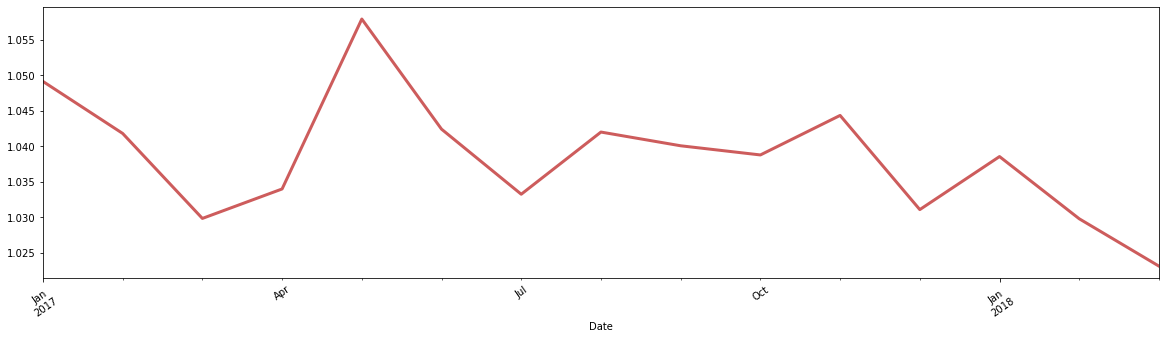

In [72]:
orderlines.resample('M',on='Date')['Quantity'].mean().plot.line(figsize=(20,5),linewidth=3,rot=35,color='indianred');


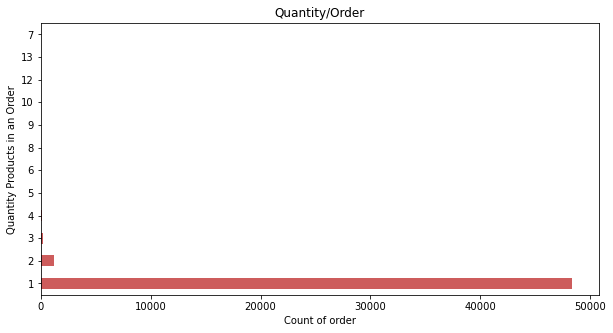

In [157]:
orderlines.Quantity.value_counts().plot.barh(figsize=(10,5),color='indianred');
plt.title('Quantity/Order');
plt.xlabel('Count of order');
plt.ylabel('Quantity Products in an Order');

In [171]:
orderlines.head()

,ID,Order_ID,Date,Year,Month,Day,Week_Day,SKU,Quantity,Unit_Price,Total_Price,Brand,Brand_Name
0,1119116,299545,2017-01-01 01:46:16,2017,1,1,Sunday,OWC0100,1,47.49,47.49,OWC,OWC
1,1119814,299891,2017-01-01 19:25:47,2017,1,1,Sunday,OWC0186,1,56.99,56.99,OWC,OWC
2,1119923,299944,2017-01-01 20:31:21,2017,1,1,Sunday,OWC0024,1,24.69,24.69,OWC,OWC
3,1119933,299944,2017-01-01 20:36:45,2017,1,1,Sunday,OWC0092,1,44.64,44.64,OWC,OWC
4,1120182,299404,2017-01-01 22:50:39,2017,1,1,Sunday,OWC0100,1,47.49,47.49,OWC,OWC


In [174]:
quantity_ordersDF = orderlines.groupby('Order_ID')['Quantity'].sum().reset_index()

In [176]:
orders = orders.merge(quantity_ordersDF, on='Order_ID')

In [189]:
orders['Percent_Off'] = 100 - (orders.Total_Price / orders.Total_Invoice * 100).round(2)

In [190]:
orders.head()

,Order_ID,Date,Year,Month,Day,Week_Day,Invoice_Status,Total_Invoice,Total_Price,Difference,Quantity,Percent_Off
0,241423,2017-11-06 13:10:02,2017,11,6,Monday,Completed,136.15,129.16,6.99,1,5.13
1,242832,2017-12-31 17:40:03,2017,12,31,Sunday,Completed,15.76,10.77,4.99,1,31.66
2,243330,2017-02-16 10:59:38,2017,2,16,Thursday,Completed,84.98,77.99,6.99,1,8.23
3,245275,2017-06-28 11:35:37,2017,6,28,Wednesday,Completed,149.00,149.00,0.00,1,0.00
4,246018,2017-02-13 23:02:57,2017,2,13,Monday,Completed,211.95,206.96,4.99,4,2.35


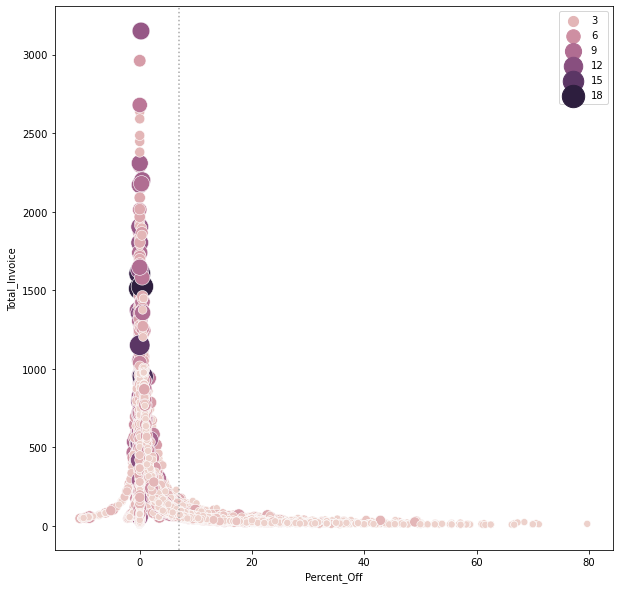

In [398]:
plt.subplots(figsize=(10, 10))

relations_Percent_Price_Quantity = sns.scatterplot(
data=orders,
x='Percent_Off',
y='Total_Invoice',
hue='Quantity',
size='Quantity',
sizes=(50,500)
    
);

mean_Percent = orders.Percent_Off.mean()
relations_Percent_Price_Quantity.axvline(mean_Percent, linestyle=':', color='darkgray')
plt.legend();

## Brands

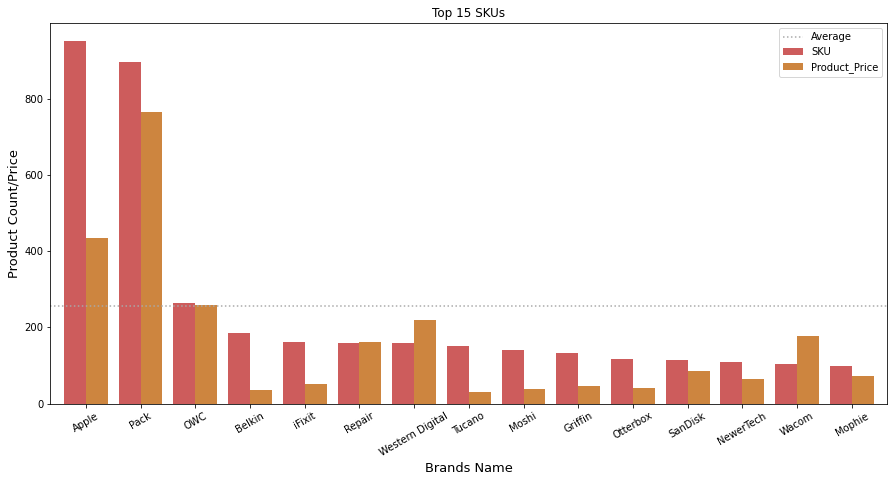

In [217]:
plot_Brands = (
    products
    .groupby('Brand_Name')
    .agg({'SKU':'count','Product_Price':'mean'})
    .nlargest(15,'SKU')
    .plot.bar(figsize=(15,7), color=['indianred', 'peru'], title='Top 15 SKUs',width=0.8,rot=30)
             
);

plot_Brands.axhline(products['Product_Price'].mean(), linestyle=':', color='darkgray',label='Average')

plt.xlabel('Brands Name',fontdict={'fontsize':13});
plt.ylabel('Product Count/Price',fontdict={'fontsize':13});
plt.legend();


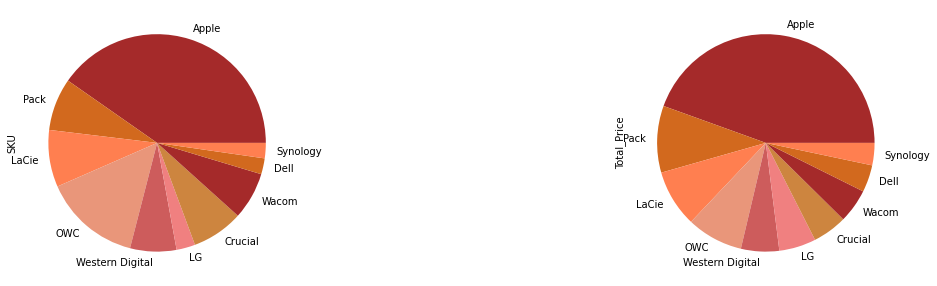

In [49]:
(
    orderlines.groupby(['Brand_Name'])
    .agg({'SKU':'count','Total_Price':'sum'})
    .nlargest(10,'Total_Price')
    .plot.pie(figsize=(20,5),subplots=True,legend=False,
              colors=['brown','chocolate','coral', 'darksalmon','indianred','lightcoral','peru']
));

## Only 3 months appears both Years

In [132]:
orders_commonMonth = (
    orders.loc[(orders.Date.dt.month == 1)|(orders.Date.dt.month == 2)|(orders.Date.dt.month == 3), :]
    .groupby(['Year','Month'])
    .agg({'Total_Invoice':'sum'})
    .reset_index()


)

In [133]:
orders_commonMonth = orders_commonMonth.loc[~(orders_commonMonth.Total_Invoice == 0.00)]

In [124]:
orders_commonMonth['Year'] = orders_commonMonth.Date.dt.year

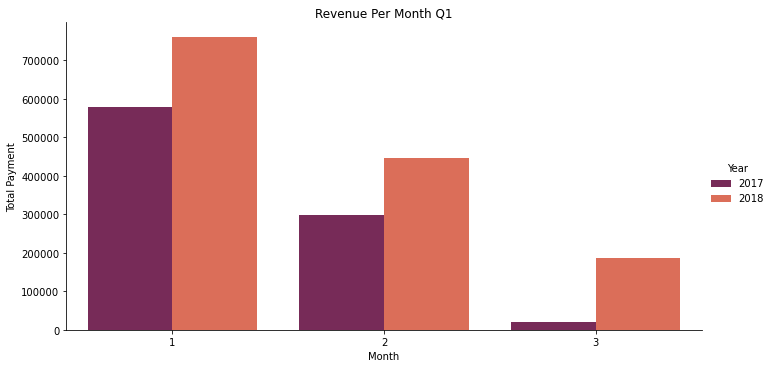

In [148]:
sns.catplot(data=orders_commonMonth,
            x='Month',
            y='Total_Invoice',
            kind='bar',
            hue='Year',
            palette='rocket',
            aspect=2
);
plt.title('Revenue Per Month Q1');
plt.ylabel('Total Payment');


***We can see that the revenue decrease from Jan to March for both year, but the revenue is increasing anyway)

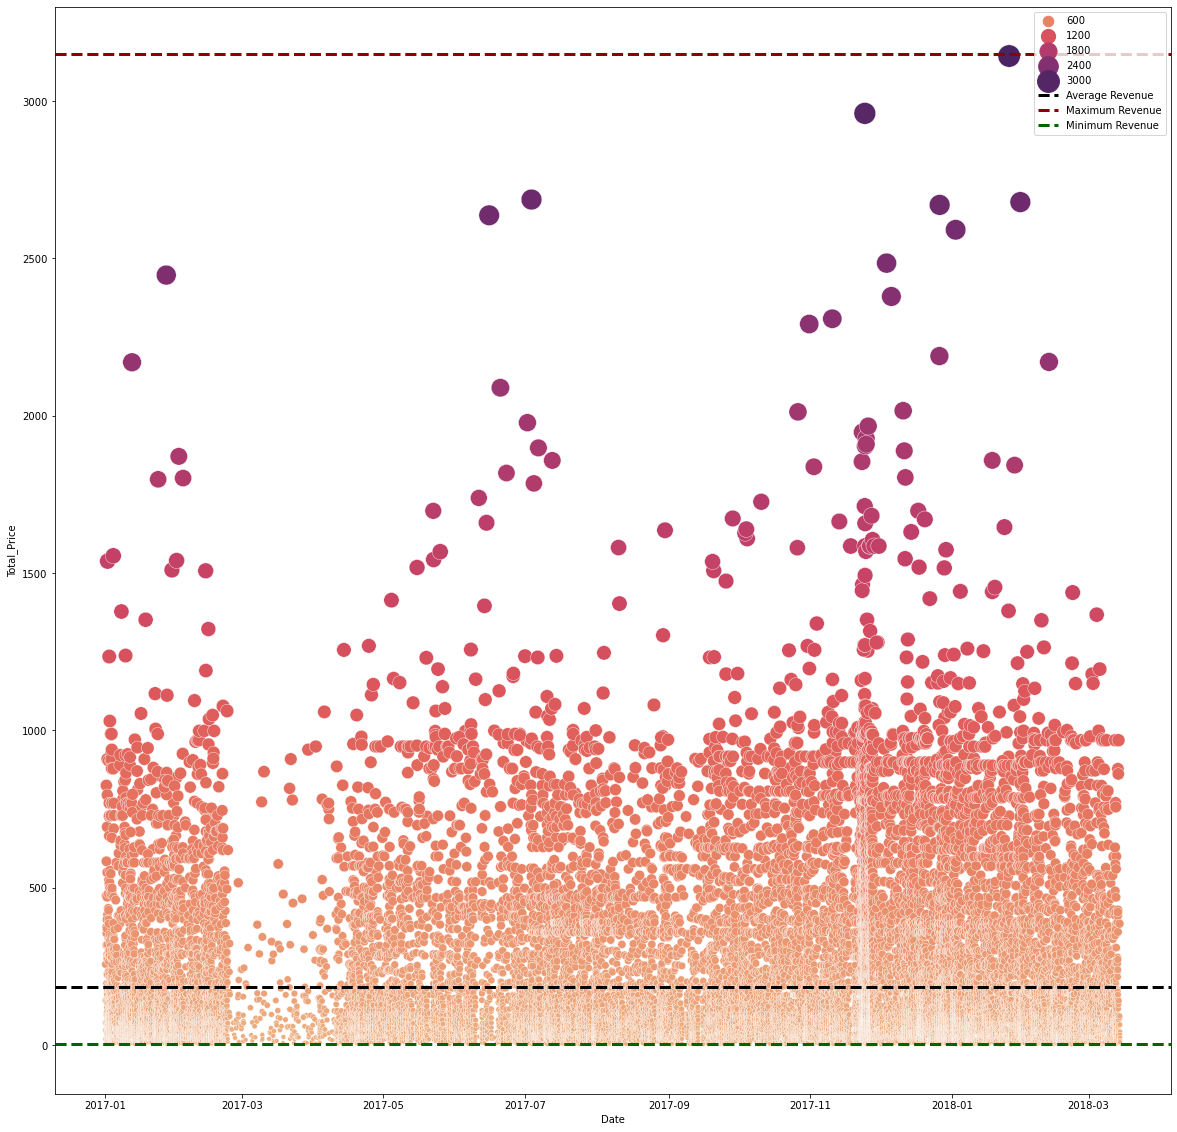

In [452]:
plt.subplots(figsize=(20, 20))
Plot_Revenue = sns.scatterplot(data=orders, x='Date', y='Total_Price', size='Total_Price', sizes=(20,500), hue='Total_Price', palette='flare')
Plot_Revenue.axhline(orders.Total_Invoice.mean(), ls='--',lw=3, c='black',label='Average Revenue');
Plot_Revenue.axhline(orders.Total_Invoice.max(), ls='--',lw=3, c='darkred',label='Maximum Revenue');
Plot_Revenue.axhline(orders.Total_Invoice.min(), ls='--',lw=3, c='darkgreen',label='Minimum Revenue');

plt.legend();


In [456]:
Disc_Month = orders.resample('M',on='Date')[['Date','Total_Invoice', 'Difference','Percent_Off']].agg({'Total_Invoice':'sum', 'Difference':'sum','Percent_Off':'mean'}).reset_index()
Disc_Month

,Date,Total_Invoice,Difference,Percent_Off
0,2017-01-31,578546.49,15418.77,8.090578
1,2017-02-28,297504.00,8549.25,8.481395
2,2017-03-31,20730.84,120.80,1.549932
3,2017-04-30,205566.97,2750.79,5.292385
4,2017-05-31,268315.58,2473.08,4.168586
5,2017-06-30,250373.78,5144.68,7.728303
6,2017-07-31,518103.86,10092.63,6.809574
7,2017-08-31,334914.70,5869.38,5.848375
8,2017-09-30,325064.90,7476.87,7.896874
9,2017-10-31,491247.30,9865.21,6.976180


In [471]:
Disc_Month.Total_Invoice.mean(),Disc_Month.Percent_Off.mean()

(460631.27199999994, 6.642215632968854)

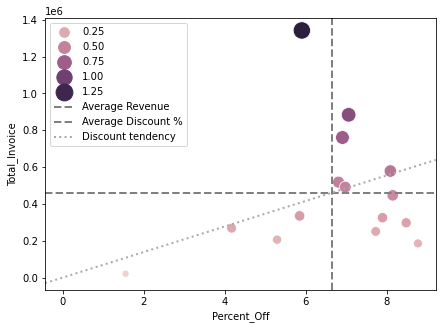

In [476]:

plt.subplots(figsize=(7, 5))
Plot_Rel_Disc_Price = sns.scatterplot(data=Disc_Month,
                                      x='Percent_Off',
                                      y='Total_Invoice',
                                      hue='Total_Invoice',
                                      sizes=(50,300),
                                      size='Total_Invoice'
)
Plot_Rel_Disc_Price.axhline(Disc_Month.Total_Invoice.mean(), ls='--',lw=2, c='gray',label='Average Revenue')
Plot_Rel_Disc_Price.axvline(Disc_Month.Percent_Off.mean(), ls='--',lw=2, c='gray',label='Average Discount %')
Plot_Rel_Disc_Price.axline((0, 0), (6.642215632968854,460631.27199999994), lw=2, c='darkgray', ls=':', label='Discount tendency')
;
plt.legend();

In [401]:
orders

,Order_ID,Date,Year,Month,Day,Week_Day,Invoice_Status,Total_Invoice,Total_Price,Difference,Quantity,Percent_Off
0,241423,2017-11-06 13:10:02,2017,11,6,Monday,Completed,136.15,129.16,6.99,1,5.13
1,242832,2017-12-31 17:40:03,2017,12,31,Sunday,Completed,15.76,10.77,4.99,1,31.66
2,243330,2017-02-16 10:59:38,2017,2,16,Thursday,Completed,84.98,77.99,6.99,1,8.23
3,245275,2017-06-28 11:35:37,2017,6,28,Wednesday,Completed,149.00,149.00,0.00,1,0.00
4,246018,2017-02-13 23:02:57,2017,2,13,Monday,Completed,211.95,206.96,4.99,4,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...
37484,527034,2018-03-14 11:44:55,2018,3,14,Wednesday,Completed,28.97,23.98,4.99,2,17.22
37485,527035,2018-03-14 11:44:34,2018,3,14,Wednesday,Completed,37.98,32.99,4.99,2,13.14
37486,527036,2018-03-14 11:47:22,2018,3,14,Wednesday,Completed,28.97,23.98,4.99,2,17.22
37487,527042,2018-03-14 11:47:50,2018,3,14,Wednesday,Completed,18.98,13.99,4.99,1,26.29
